# Исследование данных интернет-магазина "Стримчик"  


Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**  
Данные о продажах , оценках, жанрах и платформах игр мы получили из файла games.csv.  
О данных ничего не известно, поэтому необходимо перед проверкой из влияния на продажи и нахождения различных зависимостей мы произведём преобработку данных.  
Таким образом исследование будет состоять из следующих этапов:

Шаг 1. Откроем файл с данными и изучим общую информацию.  
Шаг 2. Подготовим данные. Приведём к нижнему регистру названия столбцов, обработаем пропуски,преобразуем данные в нужный тип.  
Шаг 3. Проведём исследовательский анализ данных.  
Шаг 4. Составим портрет пользователя каждого региона.  
Шаг 5. Сформируем гипотезы и проверим их.






In [1]:
#Загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Открываем файл с данными
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#Посмотрим информацию о нашей таблице. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Посчитаем количество пустых значений.
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
#Посмотрим какие столбцы у нас имеются, и все ли с ними впорядке.
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

***Шаг 2. Подготовим данные***


In [6]:
data.columns = data.columns.str.lower() #Приводим к единому регистру наименования столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# Приведем к нижнему регистру данные в столбцах:
for column in data[['platform','genre','rating']]:
    data[column] = data[column].str.lower()

In [8]:
data.loc[data['user_score']=='tbd','user_score']= -1
data['user_score'] = data['user_score'].fillna(-1)
data['user_score'] = data['user_score'].astype('float64')

Далее преобразовываем года и оценки критиков в целочисленный тип.

In [9]:
data['year_of_release'] = data['year_of_release'].astype('Int64')


Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец.

In [10]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Удалил пропуски в колонке name, genre и year_of_release.

In [11]:
data.dropna(subset=['name', 'genre', 'year_of_release']).reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,Super Mario Bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN,40.24
2,Mario Kart Wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,Wii Sports Resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,Pokemon Red/Pokemon Blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,0.01
16440,LMA Manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,-1.0,NaN,0.01
16441,Haitaka no Psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,0.01
16442,Spirits & Spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,-1.0,NaN,0.01


***Шаг 3. Проведём исследовательский анализ данных***



Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0, 0.5, 'Количество выпущенных игр')

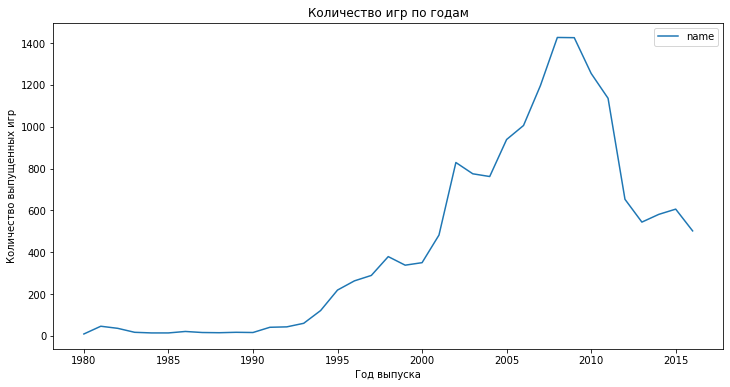

In [12]:
games_by_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_by_year)
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")


Исходя из графика видно, что количество выпускаемых игр сохраняет один уровень начиная с начала 80-х годов до начала 90-х годов. Далее в связи с резким развитием компьютеров и параллельно с этим увеличением их доступности для персонального пользования начинает также резко увеличиваться количество выпускаемых игр.   
Такой рост продолжается вплоть до 2008 г. и далее количество выпускаемых игр снижается.
Моё предположение причины снижения количество игр - это повышение игровых стандартов. С каждым годом запрос на более качественные игры увеличивается, что не оставляется шансов выпускаться в "массы" независимые продукты в прежнем количестве. 


Далее посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и постройте распределение по годам. Узнаем за какой характерный срок появляются новые и исчезают старые платформы?

Text(0, 0.5, 'Количество продаж')

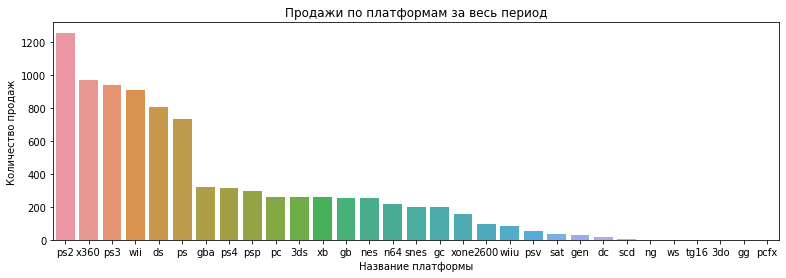

In [13]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(13,4))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Судя по графику видно, что самые крупные продажы игр были у консолей PS, PS2, PS3, X360, Wii, а также DS.  
Построим распределение по годам для каждой из них.  

Возьмем данные начиная с 2000 г., когда начинается максимальный рост продаж игр.


In [14]:
after_2000 = data[data['year_of_release']>=2000]

Далее выбираем топ 5 платформ и строим для них распределение по годам.

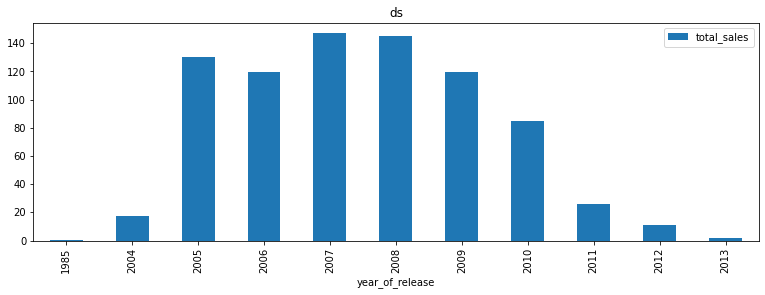

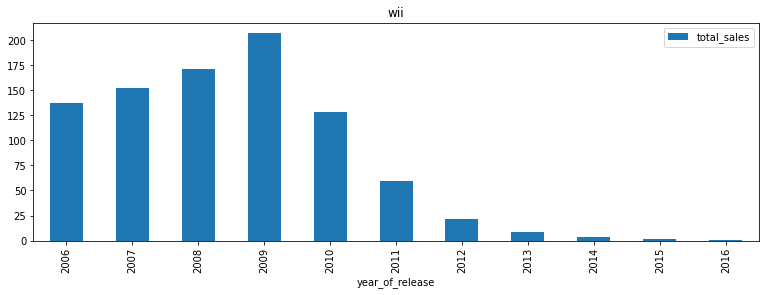

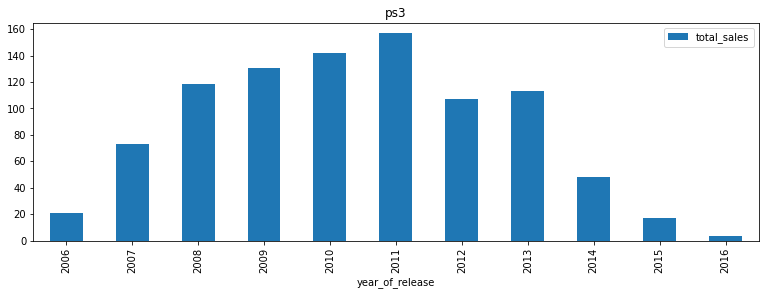

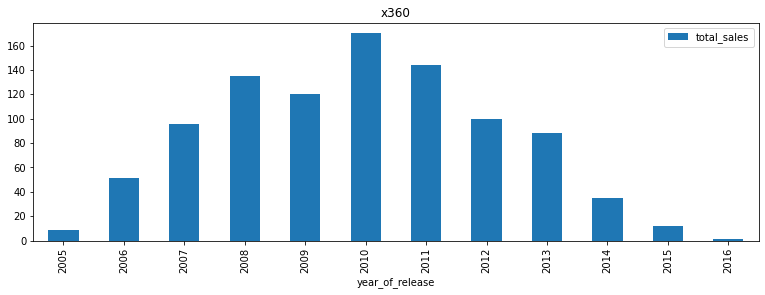

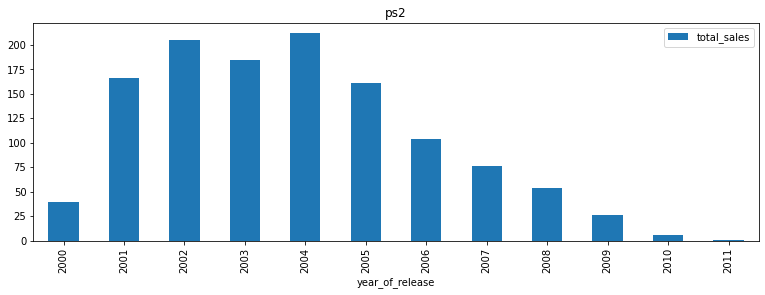

In [15]:
platforms_lead = after_2000.groupby('platform')['total_sales'].sum().sort_values()[-5:].index.tolist()
for platform in platforms_lead:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)


Судя по графикам характерный срок популярности игровой платформы составляет около 10 лет.  
PS2 с 2000 по 2010  
X360 с 2005 по 2016   
PS3 2006 - 2016   
Wii 2006 - 2016    
DS с 2004 по 2013  




Далее определяем актуальный период, данные которого помогут построить прогноз на 2017 г.

На мой взгляд логично взять данные с 2012 г. 

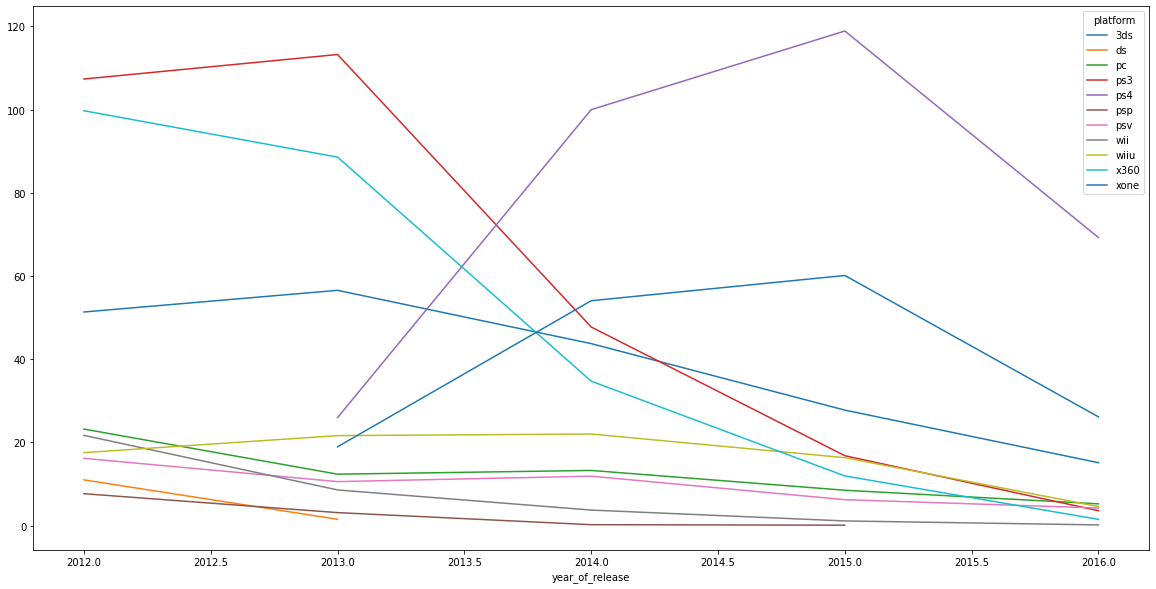

In [16]:
actual_period = data[data['year_of_release']>=2012]
actual_period.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(figsize=(20,10))
plt.show()

Исходя из графика видно, что наиболее актуальные платформы в период, который может оказать влияние на 2017 год - это PS4, Xone, PC, Wii, 3DS, PSV.

In [17]:
#Сохраним данные платформы в переменную list_of_top_platform и избавимся в данных от выбросов.
list_of_top_platform = ['ps4','xone','pc','wiiu','3ds', 'psv']
games_top_6_platforms = actual_period[actual_period['platform'].isin(list_of_top_platform)]
games_top_6_platforms['total_sales'].describe()

count    1843.000000
mean        0.467765
std         1.139778
min         0.010000
25%         0.030000
50%         0.110000
75%         0.370000
max        14.630000
Name: total_sales, dtype: float64

In [18]:
#Посмотрим на количество выпущенных каждой платформой игр, а также на средние глобальные продажи по платформам.
games_top_6_platforms.groupby('platform')['total_sales'].describe()


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
pc,250.0,0.250600,0.494640,0.01,0.03,0.08,0.2400,5.14
ps4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
psv,411.0,0.119659,0.203011,0.01,0.02,0.05,0.1200,1.96
wiiu,147.0,0.559116,1.058836,0.01,0.08,0.22,0.5250,7.09
xone,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


Построим график «Ящик с усами» по глобальным продажам игр в разбивке по платформам.

(0.0, 3.0)

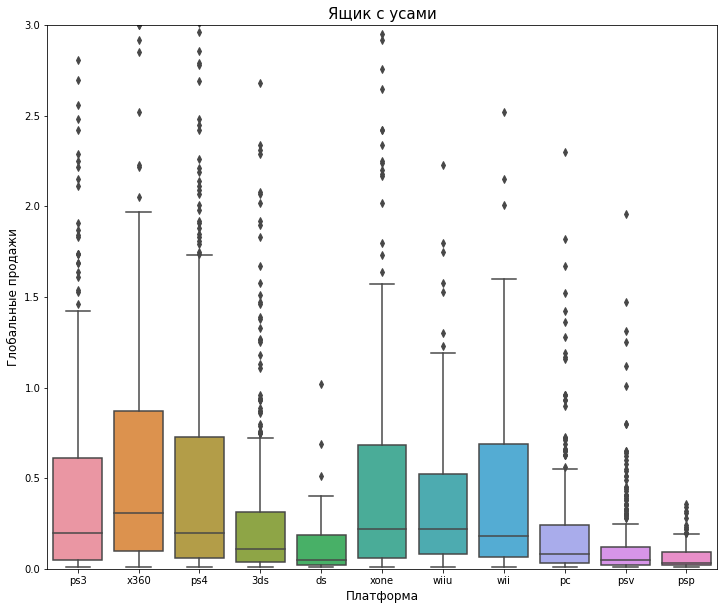

In [19]:
#Возьмём выборку данных по продажам до 1.2 миллионов, чтобы исключить выбросы и построить более наглядные графики.
plt.figure(figsize=(12,10))
sns.boxplot(data=actual_period, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0, 3)


Далее посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.


In [20]:
#Корреляция для XOne между отзывами и продажами
xbox_one = actual_period[(actual_period['platform']=='xone')&(actual_period['user_score']!=-1)]
correl = xbox_one['user_score'].corr(xbox_one['total_sales'])
critic_correl = xbox_one['critic_score'].corr(xbox_one['total_sales'])
print('Корреляция между отзывами пользователей и продажами ', correl)
print('Корреляция между отзывами критиков и продажами ', critic_correl)

Корреляция между отзывами пользователей и продажами  -0.06892505328279414
Корреляция между отзывами критиков и продажами  0.41042203561296375


Text(0.5, 1.0, 'corr_XOne_critic')

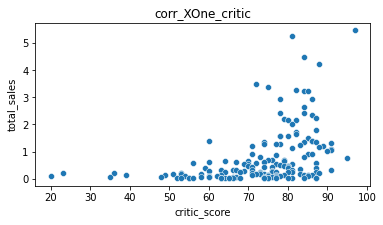

In [21]:
#Диаграмма рассеяния оценки критиков для XOne
plt.figure(figsize=(6,3))
sns.scatterplot(x='critic_score', y='total_sales', data=xbox_one)
plt.title('corr_XOne_critic')

In [22]:
#Корреляция для PS4 между отзывами и продажами
play_station4 = actual_period[(actual_period['platform']=='ps4')&(actual_period['user_score']!=-1)]
correl = play_station4['user_score'].corr(play_station4['total_sales'])
critic_correl = play_station4['critic_score'].corr(play_station4['total_sales'])
print('Корреляция между отзывами пользователей и продажами ', correl)
print('Корреляция между отзывами критиков и продажами ', critic_correl)

Корреляция между отзывами пользователей и продажами  -0.031957110204556376
Корреляция между отзывами критиков и продажами  0.40589480145836687


Text(0.5, 1.0, 'corr_ps4_users')

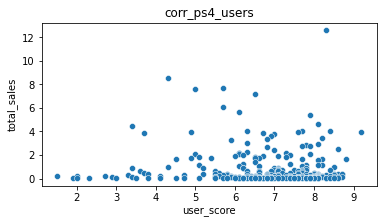

In [23]:
#Диаграмма рассеяния оценки пользователей для PS4
plt.figure(figsize=(6,3))
sns.scatterplot(x='user_score', y='total_sales', data=play_station4)
plt.title('corr_ps4_users')

Text(0.5, 1.0, 'corr_ps4_critic')

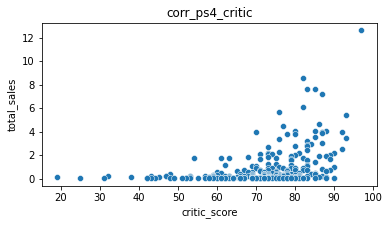

In [24]:
#Диаграмма рассеяния оценки критиков для PS4
plt.figure(figsize=(6,3))
sns.scatterplot(x='critic_score', y='total_sales', data=play_station4)
plt.title('corr_ps4_critic')

In [25]:
#Корреляция для 3DS между отзывами и продажами
ds = actual_period[(actual_period['platform']=='3ds')&(actual_period['user_score']!=-1)]
correl = ds['user_score'].corr(ds['total_sales'])
critic_correl = ds['critic_score'].corr(ds['total_sales'])
print('Корреляция между отзывами пользователей и продажами ', correl)
print('Корреляция между отзывами критиков и продажами ', critic_correl)

Корреляция между отзывами пользователей и продажами  0.19758263411038599
Корреляция между отзывами критиков и продажами  0.31055301915326294


Text(0.5, 1.0, 'corr_3DS_users')

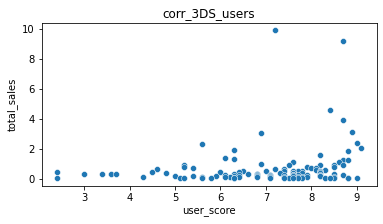

In [26]:
#Диаграмма рассеяния оценки пользователей для 3DS
plt.figure(figsize=(6,3))
sns.scatterplot(x='user_score', y='total_sales', data=ds)
plt.title('corr_3DS_users')

Text(0.5, 1.0, 'corr_3DS_critic')

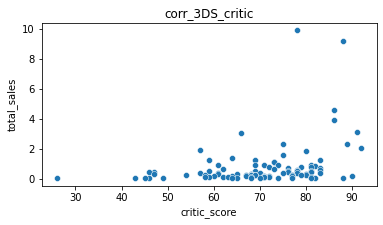

In [27]:
#Диаграмма рассеяния оценки критиков для 3DS
plt.figure(figsize=(6,3))
sns.scatterplot(x='critic_score', y='total_sales', data=ds)
plt.title('corr_3DS_critic')

In [28]:
#Корреляция для PSV между отзывами и продажами
vita = actual_period[(actual_period['platform']=='psv')&(actual_period['user_score']!=-1)]
correl = vita['user_score'].corr(vita['total_sales'])
critic_correl = vita['critic_score'].corr(vita['total_sales'])
print('Корреляция между отзывами пользователей и продажами ', correl)
print('Корреляция между отзывами критиков и продажами ', critic_correl)

Корреляция между отзывами пользователей и продажами  -0.004339437514314869
Корреляция между отзывами критиков и продажами  0.09398804100946612


Text(0.5, 1.0, 'corr_PSV_users')

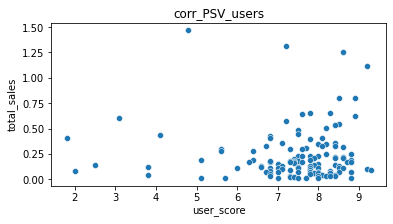

In [29]:
#Диаграмма рассеяния оценки пользователей для PSV
plt.figure(figsize=(6,3))
sns.scatterplot(x='user_score', y='total_sales', data=vita)
plt.title('corr_PSV_users')

Text(0.5, 1.0, 'corr_PSV_critic')

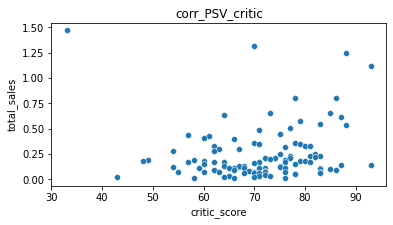

In [30]:
#Диаграмма рассеяния оценки критиков для PSV
plt.figure(figsize=(6,3))
sns.scatterplot(x='critic_score', y='total_sales', data=vita)
plt.title('corr_PSV_critic')

In [31]:
#Корреляция для PC между отзывами и продажами
personal_comp = actual_period[(actual_period['platform']=='pc')&(actual_period['user_score']!=-1)]
correl = personal_comp['user_score'].corr(personal_comp['total_sales'])
critic_correl = personal_comp['critic_score'].corr(personal_comp['total_sales'])
print('Корреляция между отзывами пользователей и продажами ', correl)
print('Корреляция между отзывами критиков и продажами ', critic_correl)

Корреляция между отзывами пользователей и продажами  -0.12186747630735577
Корреляция между отзывами критиков и продажами  0.23600773618792362


Text(0.5, 1.0, 'corr_PC_users')

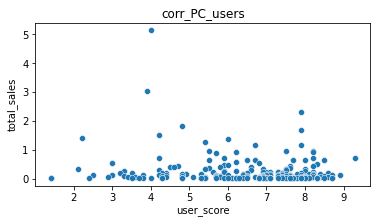

In [32]:
#Диаграмма рассеяния оценки пользователей для PC
plt.figure(figsize=(6,3))
sns.scatterplot(x='user_score', y='total_sales', data=personal_comp)
plt.title('corr_PC_users')

Text(0.5, 1.0, 'corr_PC_users')

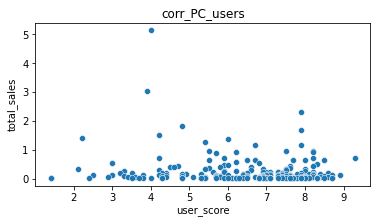

In [33]:
#Диаграмма рассеяния оценки пользователей для PC
plt.figure(figsize=(6,3))
sns.scatterplot(x='user_score', y='total_sales', data=personal_comp)
plt.title('corr_PC_users')

In [34]:
#Корреляция для WiiU между отзывами и продажами
nin_wii = actual_period[(actual_period['platform']=='wiiu')&(actual_period['user_score']!=-1)]
correl = nin_wii['user_score'].corr(nin_wii['total_sales'])
critic_correl = nin_wii['critic_score'].corr(nin_wii['total_sales'])
print('Корреляция между отзывами пользователей и продажами ', correl)
print('Корреляция между отзывами критиков и продажами ', critic_correl)

Корреляция между отзывами пользователей и продажами  0.4002190202148617
Корреляция между отзывами критиков и продажами  0.350882422488643


Text(0.5, 1.0, 'corr_WiiU_users')

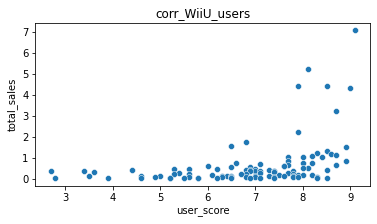

In [35]:
#Диаграмма рассеяния оценки пользователей для WiiU
plt.figure(figsize=(6,3))
sns.scatterplot(x='user_score', y='total_sales', data=nin_wii)
plt.title('corr_WiiU_users')

Text(0.5, 1.0, 'corr_WiiU_users')

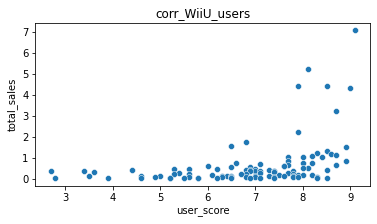

In [36]:
#Диаграмма рассеяния оценки пользователей для WiiU
plt.figure(figsize=(6,3))
sns.scatterplot(x='user_score', y='total_sales', data=nin_wii)
plt.title('corr_WiiU_users')

У PS4, XOne, 3DS, PC, PSV, а также WiiU наблюдается увернная зависимость продаж от оценки критиков. От оценки пользователей продажи игр на данных платформах зависят меньше.  


Далее посмотрим на общее распределение игр по жанрам. 

In [37]:
distr_genre = actual_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,action,441.12
1,shooter,304.73
2,role-playing,192.80
3,sports,181.07
4,misc,85.04
5,platform,61.00
6,racing,53.50
7,fighting,44.49
8,simulation,35.12
9,adventure,29.43


Text(0, 0.5, 'Продажи')

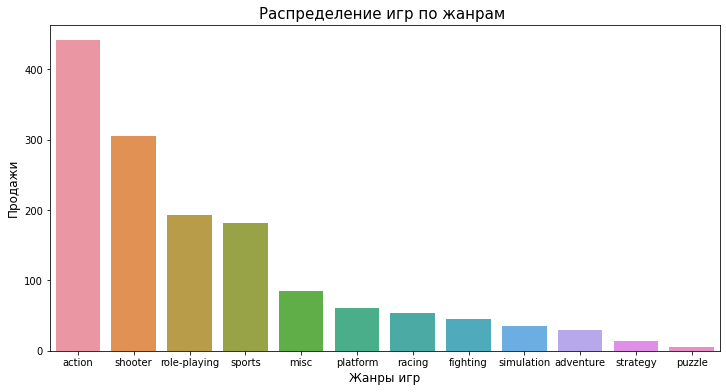

In [38]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Жанры в стиле Action занимают огромную часть рынка, обгоняя по своим продажам. На втором месте расположились шутеры, а третье место занимают ролевые игры.

In [39]:
distr_genre = actual_period.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,shooter,0.440
1,sports,0.240
2,platform,0.210
3,role-playing,0.140
4,racing,0.140
5,fighting,0.130
6,action,0.120
7,misc,0.120
8,simulation,0.120
9,strategy,0.080


Text(0, 0.5, 'Продажи')

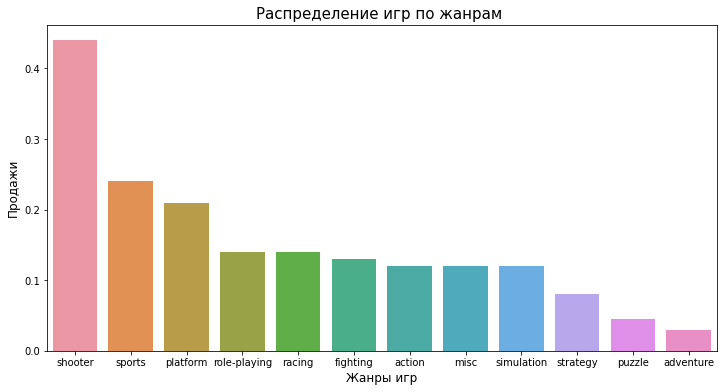

In [40]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Сформировали сравнение жанров по медианным продажам.  
Основываясь на данных, в которых мы нивелировали влияние супер успешных игр на определённых платформах, делаем вывод, что самый стабильный жанр - это shooter, далее расположились спортивные жанры и платформеры. 

***Шаг 4. Составим портрет пользователя каждого региона***


Определим для пользователя каждого региона (NA, EU, JP):

In [41]:
def user_portrait(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes):
        ppivot = data.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        display(ppivot)
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)       
plt.show()
sns.set()
#Функция для создания сводных таблиц за последний год
def user_portrait_2016(row, title):
    temp = data[data['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        display(ppivot)
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

,platform,na_sales
0,x360,602.47
1,ps2,583.84
2,wii,496.90
3,ps3,393.49
4,ds,382.40


,genre,na_sales
0,action,879.01
1,sports,684.43
2,shooter,592.24
3,platform,445.50
4,misc,407.27


,rating,na_sales
0,e,1292.99
1,t,759.75
2,m,748.48
3,e10+,353.32
4,k-a,2.56


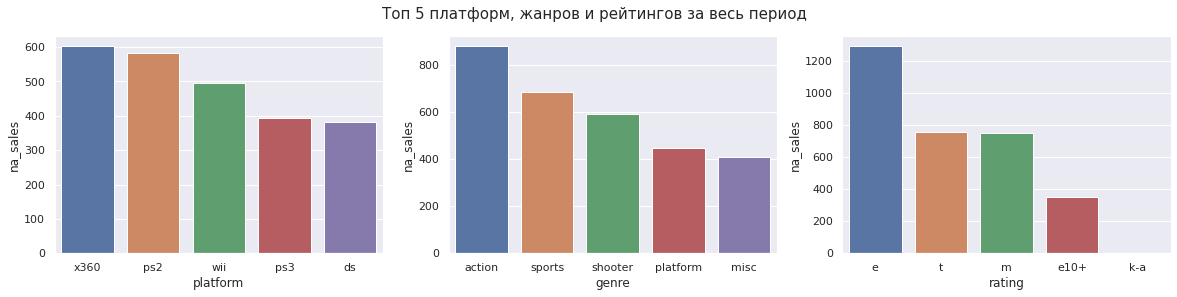

In [42]:
user_portrait('na_sales','Топ 5 платформ, жанров и рейтингов за весь период')


,platform,na_sales
0,ps4,21.49
1,xone,14.27
2,3ds,4.14
3,wiiu,2.10
4,pc,1.36


,genre,na_sales
0,shooter,16.24
1,action,9.29
2,sports,7.54
3,role-playing,5.89
4,fighting,1.84


,rating,na_sales
0,m,15.67
1,t,8.95
2,e,7.97
3,e10+,3.81


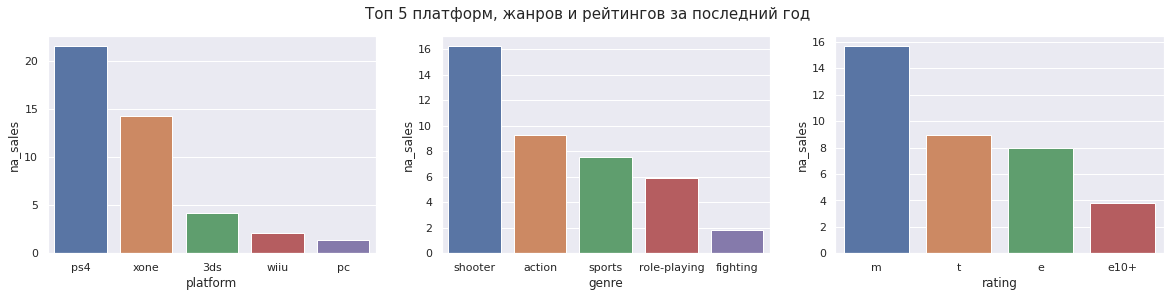

In [43]:
user_portrait_2016('na_sales','Топ 5 платформ, жанров и рейтингов за последний год')


**Вывод.**

Судя по графикам самые популярные игровые платформы в Северной Америке за все время это: X360, PS2, Wii, PS3, DS.
А за 2016 год распределение на рынке поменялось и почте все платформы сменили своё поколение и топ уже состоит из: PS4, XOne, 3DS, WiiU, PC.
Топ 5 жанров в Северной Америке за все время: Action, Sports genre, Shooter, Platform, Misc. И тут опять к 2016 году распределение сил между жанрами поменялось и топ уже состоит в порядке убывания из: Shooter, Action, Sports genre, Role-Playing, Fighting.
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом 'E' - для всех, на втором месте игры с рейтингом 'T'- teen, и на третьем месте игры с рейтингом 'M' - mature.
Если же взять данные за последний год, то общая картина меняется. Лидируют игры с рейтингом 'M' - mature, затем идут игры 'T'- teen, и на третьем месте с рейтингом 'E' - для всех.


,platform,eu_sales
0,ps2,339.29
1,ps3,330.29
2,x360,270.76
3,wii,262.21
4,ps,213.61


,genre,eu_sales
0,action,519.13
1,sports,376.79
2,shooter,317.34
3,racing,236.51
4,misc,212.74


,rating,eu_sales
0,e,710.25
1,m,483.97
2,t,427.03
3,e10+,188.52
4,ao,0.61


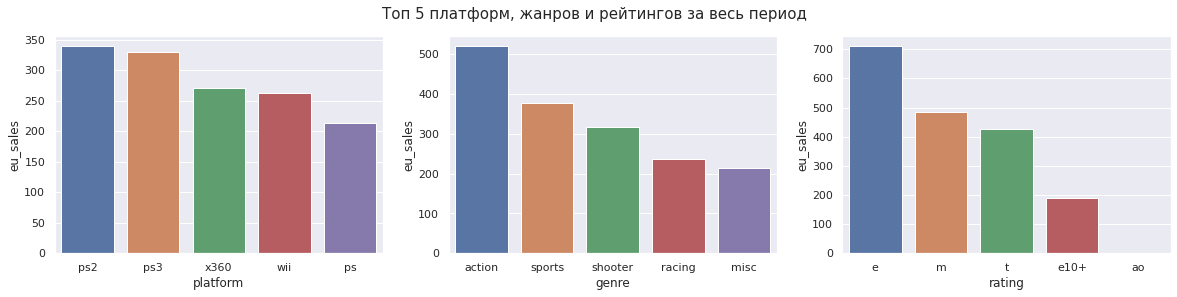

In [44]:
user_portrait('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период')


,platform,eu_sales
0,ps4,31.78
1,xone,9.63
2,pc,3.53
3,3ds,2.33
4,wiiu,1.48


,genre,eu_sales
0,shooter,15.90
1,sports,12.01
2,action,10.68
3,role-playing,4.28
4,racing,1.77


,rating,eu_sales
0,m,16.54
1,e,13.61
2,t,9.79
3,e10+,3.81


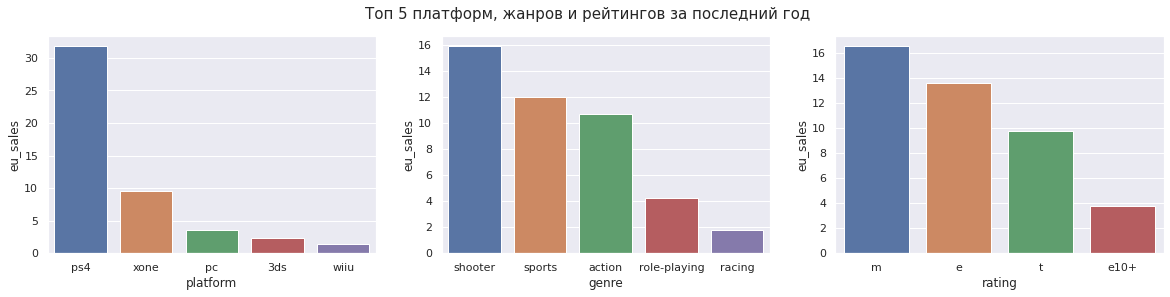

In [45]:
user_portrait_2016('eu_sales','Топ 5 платформ, жанров и рейтингов за последний год')


**Вывод.**

Судя по графикам самые популярные игровые платформы в Европе за все время это:PS2, PS3, X360, Wii, PS.  
А за 2016 год распределение на рынке поменялось и почте все платформы сменили своё поколение и топ уже состоит из: PS4, XOne, PC, 3DS, WiiU.  
Топ 5 жанров в Европе за все время: Action, Sports, Shooter genre, Racing, Misc. И тут опять к 2016 году распределение сил между жанрами поменялось и топ уже состоит в порядке убывания из: Shooter, Sports genre, Action genre,  Role-Playing, Racing.
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом 'E' - для всех, на втором месте игры с рейтингом 'M' - mature, и на третьем месте игры с рейтингом 'T'- teen.
Если же взять данные за последний год, то общая картина меняется. Лидируют игры с рейтингом 'M' - mature, затем идут игры 'E' - для всех, и на третьем месте с рейтингом 'T'- teen.

,platform,jp_sales
0,ds,175.57
1,ps,139.82
2,ps2,139.20
3,snes,116.55
4,3ds,100.67


,genre,jp_sales
0,role-playing,355.41
1,action,161.43
2,sports,135.54
3,platform,130.83
4,misc,108.11


,rating,jp_sales
0,e,198.11
1,t,151.40
2,m,64.24
3,e10+,40.20
4,k-a,1.46


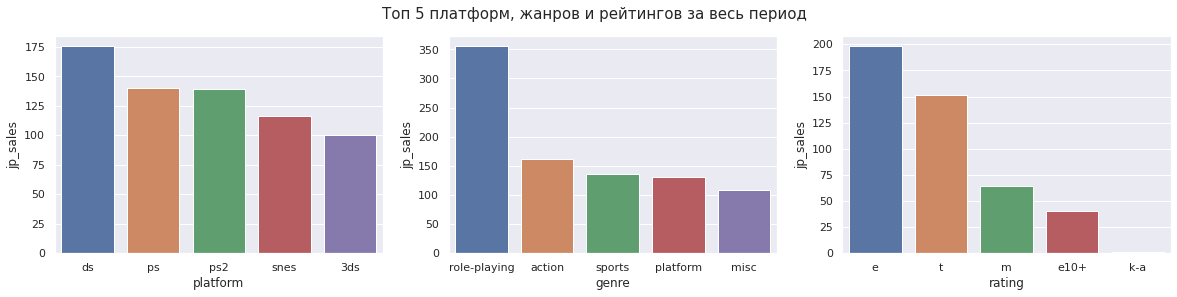

In [46]:
user_portrait('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период')


,platform,jp_sales
0,3ds,8.03
1,ps4,5.74
2,psv,3.56
3,ps3,1.30
4,wiiu,0.67


,genre,jp_sales
0,action,7.07
1,role-playing,6.61
2,adventure,1.18
3,shooter,1.06
4,misc,1.04


,rating,jp_sales
0,t,2.27
1,m,1.20
2,e,1.07
3,e10+,0.45


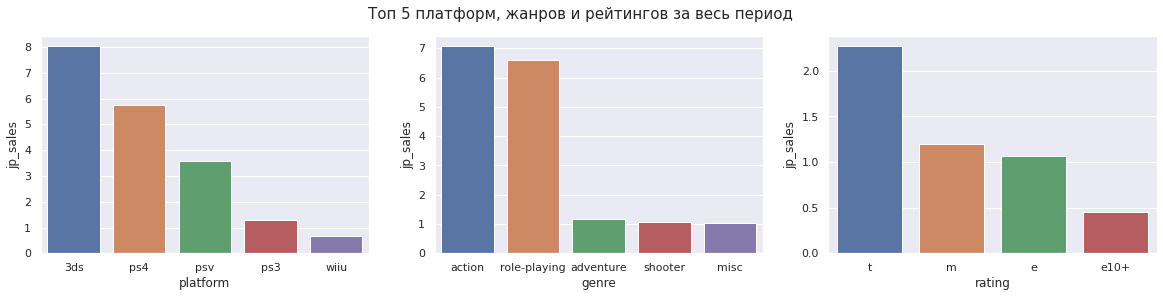

In [47]:
user_portrait_2016('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период')


**Вывод.**  
Судя по графикам самые популярные игровые платформы в Японии за все время это: DS, PS, PS2, SNES, 3DS.  
А за 2016 год топ уже состоит из: 3DS, PS4, PSV, PS3, WiiU.  
Топ 5 жанров в Японии за все время: Role-Playing, Action, Sports genre, Platform, Misc.  
А к 2016 году в Японии сформировались чёткие лидеры по жанра - это Action и Role-Playing.  
Оставшиеся жанры Adventure genre, Shooter и Misc делять 3 место собой.   
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом 'E' - для всех, на втором месте игры с рейтингом 'T'- teen, и на третьем месте игры с рейтингом 'M' - mature.  
Если же взять данные за последний год, то общая картина меняется. Лидируют игры с рейтингом 'T'- teen, затем идут игры 'M' - mature, и на третьем месте с рейтингом 'E' - для всех.

Далее выясним влияет рейтинг ESRB на продажи. Проведём исследование по всем играм без рейтинга.


In [48]:
#Заменим пропуски в столбце rating на 'undef' (undefined)
data['rating'] = data['rating'].fillna('undef')
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,Super Mario Bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,-1.0,undef,40.24
2,Mario Kart Wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,Wii Sports Resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,Pokemon Red/Pokemon Blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,-1.0,undef,31.38


In [49]:
#Исследуем продажи игр без рейтинга по платформам для Северной Америки за весь актуальный период.
no_esrb_na = data[pd.isnull(data['rating'])!='undef']
no_esrb_na = no_esrb_na[no_esrb_na['year_of_release']>2011]
no_esrb_na.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(20)

,platform,na_sales
0,x360,140.05
1,ps4,108.74
2,ps3,103.38
3,xone,93.12
4,3ds,55.31
5,wiiu,38.10
6,pc,19.12
7,wii,17.45
8,psv,10.98
9,ds,4.59


In [50]:
#Исследуем продажи игр без рейтинга по жанрам для Северной Америки за весь актуальный период.
no_esrb_na[no_esrb_na['na_sales'] > 0].pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(20)

,genre,na_sales
0,action,177.84
1,shooter,144.77
2,sports,81.53
3,role-playing,64.00
4,misc,38.19
5,platform,25.38
6,fighting,19.79
7,racing,17.22
8,adventure,8.92
9,simulation,7.97


Судя по полученным данным самые популярные платформы с играми без рейтинга отличаются от платформ, где игры имеют рейтинг.  
В Северной Америке лидируют такие платформы как: x360, ps4, ps3, xone, 3ds.  
По жанрам лидеры такие: action, shooter, sports, role-playing, misc.  
Влияние рейтинга ESRB прослеживается, но очень незначительное и больше на распределение лидирующих мест среди главные игрок, чем на самих их.

In [51]:
#Исследуем продажи игр без рейтинга по платформам для Европы за весь актуальный период.
no_esrb_eu = data[pd.isnull(data['rating'])!='undef']
no_esrb_eu = no_esrb_eu[no_esrb_eu['year_of_release']>2011]
no_esrb_eu.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(20)

,platform,eu_sales
0,ps4,141.09
1,ps3,106.86
2,x360,74.52
3,xone,51.59
4,3ds,42.64
5,pc,37.76
6,wiiu,25.13
7,wii,11.92
8,psv,11.36
9,ds,3.53


In [52]:
#Исследуем продажи игр без рейтинга по жанрам для Европы за весь актуальный период.
no_esrb_eu[no_esrb_eu['eu_sales'] > 0].pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(20)

,genre,eu_sales
0,action,159.34
1,shooter,113.47
2,sports,69.09
3,role-playing,48.53
4,racing,27.29
5,misc,26.32
6,platform,21.41
7,simulation,14.55
8,fighting,10.79
9,adventure,9.46


В европе влияние отсутствия рейтинга на продажи влияет значительно больше, ведь как указано в открытых источника, ESRB рейтинг для США и Канады. В связи с чем ключевые платформы тут отличаются от Северной Америки.
А вот влияние на жанры напротив, полностью отсутствует.
Топ жанры игр без рейтинга это: action, shooter, sports, role-playing, racing. 


In [53]:
#Исследуем продажи игр без рейтинга по платформам для Японии за весь актуальный период.
no_esrb_jp = data[pd.isnull(data['rating'])!='undef']
no_esrb_jp = no_esrb_jp[no_esrb_jp['year_of_release']>2011]
no_esrb_jp.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(20)

,platform,jp_sales
0,3ds,87.79
1,ps3,35.29
2,psv,21.04
3,ps4,15.96
4,wiiu,13.01
5,psp,10.47
6,ds,3.72
7,wii,3.39
8,x360,1.57
9,xone,0.34


In [54]:
#Исследуем продажи игр без рейтинга по жанрам для Японии за весь актуальный период.
no_esrb_jp[no_esrb_jp['jp_sales'] > 0].pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(20)

,genre,jp_sales
0,role-playing,65.44
1,action,52.80
2,misc,12.86
3,simulation,10.41
4,fighting,9.44
5,shooter,9.23
6,platform,8.63
7,adventure,8.24
8,sports,8.01
9,strategy,2.88


Как и в Европе, на продажи в Японии рейтинг ESRB не влияет. Но примечательно, что отфильтровав заглушку мы не получили большой разницы с топом платформ с заглушкой.
Больше всего в Японии продавалось игр без рейтинга на платформах: 3ds, ps3, psv,ps4, wiiu.  
Что касается жанров, то в Японии популярные игры без маркировки рейтинга ESRB отличаются от игр имеющих маркировку.
Самые популярные жанры среди игр без маркировки: role-playing,action, misc, simulation, fighing, а с маркировкой уходят и топа файтинги и симуляторы сменяясь на спортивные жанры и приключения.


In [55]:
# Комментарий ревьюера
temp = actual_period.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

1275 0.4417879417879418


m       498
t       412
e       395
e10+    306
Name: rating, dtype: int64

Делаем вывод, что рейтинг игр ESRB в больше степени влияет на игровые платформы, чем на сами жанры. 

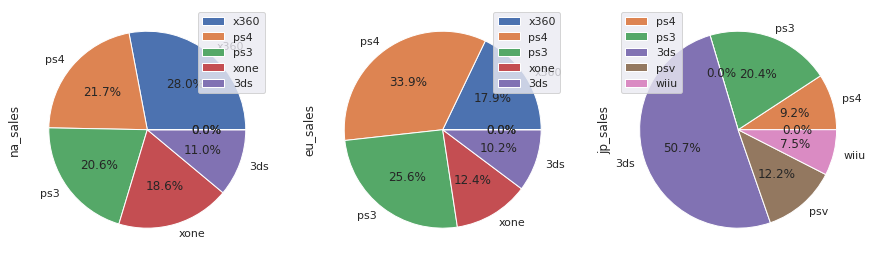

In [56]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
top_5_p = []
for i in regions:
    data_plat = actual_period.groupby('platform')[i].sum().sort_values(ascending = False).head()
    data_plat2 = 100*data_plat/actual_period[i].sum()
    top_5_p.append(data_plat2)
    top_5_plat = pd.DataFrame(top_5_p).round(2).transpose()
top_5_plat.plot(kind = 'pie', autopct = '%1.1f%%', subplots = True, figsize = (15,5))
plt.show()

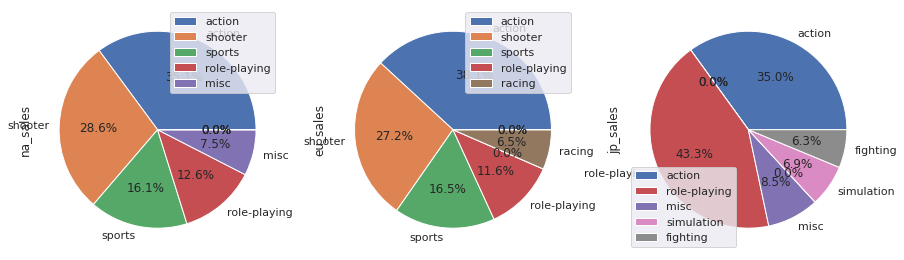

In [57]:

top_5_g = []
for i in regions:
    data_genre = actual_period.groupby('genre')[i].sum().sort_values(ascending = False).head()
    data_genre2 = 100*data_genre/actual_period[i].sum()
    top_5_g.append(data_genre2)
    top_5_genre = pd.DataFrame(top_5_g).round(2).transpose()
top_5_genre.plot(kind = 'pie', autopct = '%1.1f%%', subplots = True, figsize = (15,5))
plt.show()

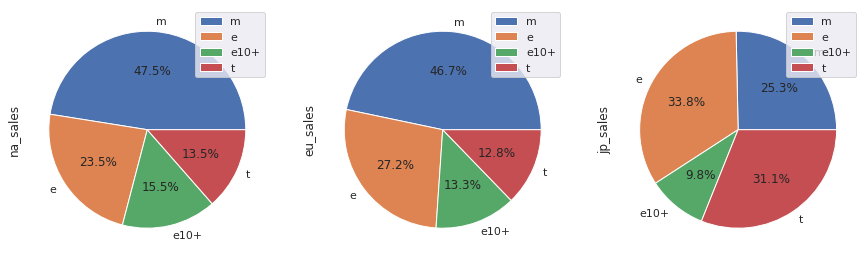

In [58]:
top_5_r = []
for i in regions:
    data_rating = actual_period.groupby('rating')[i].sum().sort_values(ascending = False)
    data_rating2 = 100*data_rating/actual_period[i].sum()
    top_5_r.append(data_rating2)
    top_5_rating = pd.DataFrame(top_5_r).round(2).transpose()
top_5_rating.plot(kind = 'pie', autopct = '%1.1f%%', subplots = True, figsize = (15,5))
plt.show()

Далее проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Принимаем за нулевую гипотезу, что средние пользовательские рейтинги платформ одинаковые.  
За альтернативную гипотезу принимаем, что средние различаются.  


In [59]:
#Сохраняем в переменные xbox_one_h и pc_h данные за весь актуальный период.
from scipy import stats as st
xbox_one_h = data.query('platform =="xone" and user_score !=-1 and year_of_release >= 2012')['user_score']
pc_h = data.query('platform =="pc" and user_score !=-1 and year_of_release >= 2012')['user_score']




In [60]:
#Вычисляем средний рейтинг по платформе xbox_one
xbox_one_h.mean()

6.521428571428572

In [61]:
#Вычисляем средний рейтинг по платформе pc_h
pc_h.mean()

6.4286407766990274

In [62]:
#Выполняем проверку гипотезы методом ttes_ind.
alpha = .05
results = st.ttest_ind(xbox_one_h, pc_h, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Значение pvalue меньше 5%. Таким образом мы не можем отвергнуть нулевую гипотезу, что средние рейтинги платформ Xbox One и PC одинаковые.

Далее проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
Принимаем за нулевую гипотезу, что редние пользовательские рейтинги жанров Action и Sports разные.  
За альтернативную гипотезу принимаем, что средние рейтинги жанров одинаковые.

In [63]:
#Сохраняем в переменные genre_action_h и genre_sports_h данные за весь актуальный период.
genre_action_h = data.query('genre =="action" and user_score !=-1 and year_of_release >= 2012')['user_score']
genre_sports_h = data.query('genre =="sports" and user_score !=-1 and year_of_release >= 2012')['user_score']




In [64]:
#Вычисляем средний рейтинг по жанру action
genre_action_h.mean()


6.825047801147227

In [65]:
#Вычисляем средний рейтинг по жанру sports
genre_sports_h.mean()


5.455897435897437

In [66]:
#Выполняем проверку гипотезы методом ttes_ind.
alpha = .05

results = st.ttest_ind(genre_action_h, genre_sports_h, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Судя по полученному значению pvaluе мы отвергаем нулевую гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

***Шаг 6. ОБЩИЙ ВЫВОД***

В данном проекте мы работали с различными данными об играх и выявляли различные закономерности определяющие их успешнось.  
Перед анализом данных мы их подготовили, привели  нижнему регистру, определили что значит аббревиатура tbd (to be determined - данные, которые были не заполнены или не собрано достаточно информации для заполнения) и заменили их, для проведения дальнейшего анализа.  
Проведя анализ мы выяснили, что количество игр начало расти с начало 90-х годов вплоть до 2008 г. После 2008 г. количество продаваемых игр начало резко снижаться. Я связываю это увеличение запроса на "качественные" игры. Также во время написания возникла гипотеза, что снижение продаж игр могло начаться из-за расцвета "пиратства".  
Самыми популярными игровыси платформами за все время сбора данных оказались: PS2, X360, PS3, WII, DS, PS.  
Также мы выяснили, что средняя продолжительность игровой платформы составляет порядка 10 лет, кроме PC, т.к. у персональных компьюетров не меняется поколение, а просто модернизируются комплектующие.  
Исходя из проделанного исследования мы можем сделать следующие выводы:  
1. Рейтинг ESRB не влияет в значительной степени на продажи игровых платформ.
Самые популярные платформы это Xbox360, PS4 и японская история с любовью к 3DS.
Эти платформы можно рассматривать как ключевые для рекламных кампаний. 
2. Ключевыми жанрами в Америке и Европе являются шутеры и экшены. В этих региона рекламные кампании по этим жанрам будут приносить прибыль. 
В японии же имеется специфика внутреннего рынка и там спортивный жанр не так популярен. В японии можно вкладывать бюджет в раскрутку ролевых игр, а так же экшн. 
3. Что касается самого рейтинга ESRB. В европейском регионе и Америке рынок делият практически одинаково. Большую часть занимают игры с рейтингом «M» («Mature») — «Для взрослых», почти 40%. Остальная часть рынка разделилась между играми с рейтингом  «E» («Everyone») — «Для всех», E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»,«T» («Teen») — «Подросткам», и играми не имеющими рейтинговых данных (18%). В этих регионах очевидно правильным решением будут рекламные кампании для игры с рейтингом "Для взрослых".
Что касается японского региона, после вынесения на диаграмму игр без рейтинга оказалось, что они занимают больше половины всего рынка (56%). Если давать рекомендации для рекламного отдела, то лучше сконцентировать на жанре, а не на рейтинге. Рекламы ролевых и экшен игр будут иметь успех!
